# Practice 5: Using Fourier Space and Spherical Harmonics for CMB 

## Course: "Métodos Estadísticos y Numéricos en Cosmología"

##### Rafael Morales Moreno, Maestría en Ciencias (Física), UNAM

## 1 Generate a Gaussian Random Field in 2D

As in the prevoius exercise (generate a GRF in 1D), you will use a similar power spectrum definition but in 2D space:

- Create a **2D real space array** in order to define your real space framework : **between 0 and 10** with 100 per 100 values (so a 100 × 100 matrix).

- Get the corresponding frequencies using **np.fft.fftfreq()** with the corresponding binning information and generate the corresponding 2D array of values $k = \sqrt{k_x^2 + k_y^2}$

- Create a Power spectrum $P(k) = (|k| + \epsilon)^{-2}$ with $\epsilon = 0.1$ in 2D space using the previous array.

- Generate five random realizations of the Fourier coefficients $\delta_{\vec{k}}$, respecting the fact that the field is real.

- Do the inverse Fourier transform of the 5 realizations

- Plot the 5 realizations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import camb
import scipy as sp
from scipy import special

In [2]:
real2d_arr = np.random.uniform(0,10,(100,100)) # *** not random.randn ??
real2d_arr

array([[0.32280724, 1.19562821, 3.98687953, ..., 6.84714871, 0.00972923,
        6.5748942 ],
       [3.51548373, 5.50849656, 4.38108847, ..., 6.33711499, 0.51441559,
        0.73102338],
       [3.79885438, 4.40305648, 4.76688379, ..., 8.16484119, 7.49709671,
        5.28469599],
       ...,
       [8.30341541, 9.40786096, 8.47000128, ..., 4.5049424 , 7.84584613,
        8.39939099],
       [5.70330508, 8.38088934, 9.03067122, ..., 4.55530011, 2.75220825,
        4.66979185],
       [3.45585173, 0.56944877, 4.89180137, ..., 6.26278056, 7.13280183,
        5.51282755]])

In [3]:
dx = 10/100 # and equal to dy too

kx = np.fft.fftfreq(real2d_arr.shape[0],dx)
ky = np.fft.fftfreq(real2d_arr.shape[1],dx) # this will be the same too
kx = np.fft.fftshift(kx)
ky = np.fft.fftshift(ky)
print(kx,'\n', ky)

k = np.zeros((100,100))
for i in range(100):
    for j in range(100):
        k[i,j] = np.sqrt(kx[i]**2 + ky[j]**2)
k

[-5.  -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3 -4.2 -4.1 -4.  -3.9 -3.8 -3.7
 -3.6 -3.5 -3.4 -3.3 -3.2 -3.1 -3.  -2.9 -2.8 -2.7 -2.6 -2.5 -2.4 -2.3
 -2.2 -2.1 -2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9
 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4  0.5
  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9
  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9  3.   3.1  3.2  3.3
  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3  4.4  4.5  4.6  4.7
  4.8  4.9] 
 [-5.  -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3 -4.2 -4.1 -4.  -3.9 -3.8 -3.7
 -3.6 -3.5 -3.4 -3.3 -3.2 -3.1 -3.  -2.9 -2.8 -2.7 -2.6 -2.5 -2.4 -2.3
 -2.2 -2.1 -2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9
 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4  0.5
  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9
  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9  3.   3.1  3.2  3.3
  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3  4.4  4.5  4

array([[7.07106781, 7.00071425, 6.93108938, ..., 6.86221539, 6.93108938,
        7.00071425],
       [7.00071425, 6.92964646, 6.85930026, ..., 6.78969808, 6.85930026,
        6.92964646],
       [6.93108938, 6.85930026, 6.7882251 , ..., 6.71788657, 6.7882251 ,
        6.85930026],
       ...,
       [6.86221539, 6.78969808, 6.71788657, ..., 6.64680374, 6.71788657,
        6.78969808],
       [6.93108938, 6.85930026, 6.7882251 , ..., 6.71788657, 6.7882251 ,
        6.85930026],
       [7.00071425, 6.92964646, 6.85930026, ..., 6.78969808, 6.85930026,
        6.92964646]])

In [4]:
epsilon = 0.1
Pk = (np.abs(k) + epsilon)**(-2)
Pk.shape

(100, 100)

In [5]:
sigma = np.sqrt(Pk)

alpha_1 = np.zeros((100,100))
alpha_2 = np.zeros((100,100))
alpha_3 = np.zeros((100,100))
alpha_4 = np.zeros((100,100))
alpha_5 = np.zeros((100,100))

for i in range(100):
    for j in range(100):
        alpha_1[i,j] = np.random.normal(0.0, sigma[i,j],size=1) # here mu = 0, std. dev = √pk
        alpha_2[i,j] = np.random.normal(0.0, sigma[i,j],size=1)
        alpha_3[i,j] = np.random.normal(0.0, sigma[i,j],size=1)
        alpha_4[i,j] = np.random.normal(0.0, sigma[i,j],size=1)
        alpha_5[i,j] = np.random.normal(0.0, sigma[i,j],size=1)

phase_1 = np.random.uniform(0, 2*np.pi, size=(100,100))
phase_2 = np.random.uniform(0, 2*np.pi, size=(100,100))
phase_3 = np.random.uniform(0, 2*np.pi, size=(100,100))
phase_4 = np.random.uniform(0, 2*np.pi, size=(100,100))
phase_5 = np.random.uniform(0, 2*np.pi, size=(100,100))

In [6]:
delta_k1 = np.zeros((100,100), dtype=complex)
delta_k2 = np.zeros((100,100), dtype=complex)
delta_k3 = np.zeros((100,100), dtype=complex)
delta_k4 = np.zeros((100,100), dtype=complex)
delta_k5 = np.zeros((100,100), dtype=complex)

for i in range(100):
    for j in range(100):
        delta_k1[i,j] = alpha_1[i,j]*np.exp(1j*phase_1[i,j])
        delta_k2[i,j] = alpha_2[i,j]*np.exp(1j*phase_2[i,j])
        delta_k3[i,j] = alpha_3[i,j]*np.exp(1j*phase_3[i,j])
        delta_k4[i,j] = alpha_4[i,j]*np.exp(1j*phase_4[i,j])
        delta_k5[i,j] = alpha_5[i,j]*np.exp(1j*phase_5[i,j])

In [7]:
for i in range(50):
    for j in range(50):
        delta_k1[-i][-j] = np.conj(delta_k1[i][j])
        delta_k2[-i][-j] = np.conj(delta_k2[i][j])
        delta_k3[-i][-j] = np.conj(delta_k3[i][j])
        delta_k4[-i][-j] = np.conj(delta_k4[i][j])
        delta_k5[-i][-j] = np.conj(delta_k5[i][j])

# Finally, making the terms of k=0 real too

delta_k1[50][50] = np.real(delta_k1[50][50]) # which is the same as make phase_realization1[k=0] = 0 in principle
delta_k2[50][50] = np.real(delta_k2[50][50])
delta_k3[50][50] = np.real(delta_k3[50][50])
delta_k4[50][50] = np.real(delta_k4[50][50])
delta_k5[50][50] = np.real(delta_k5[50][50])

In [10]:
# checking that the realness conditions was well established

delta_k1[5][7] == np.conj(delta_k1[-5][-7])

True

In [11]:
# so, now we can take the inverse fft of the fields
real_GRF1 = np.fft.ifftn(np.fft.ifftshift(delta_k1)) # NOT taking '.real'
real_GRF2 = np.fft.ifftn(np.fft.ifftshift(delta_k2)) # ifftshift
real_GRF3 = np.fft.ifftn(np.fft.ifftshift(delta_k3))
real_GRF4 = np.fft.ifftn(np.fft.ifftshift(delta_k4))
real_GRF5 = np.fft.ifftn(np.fft.ifftshift(delta_k5))


                                  Real GRF delta(r) from 5 realizations (ifft)


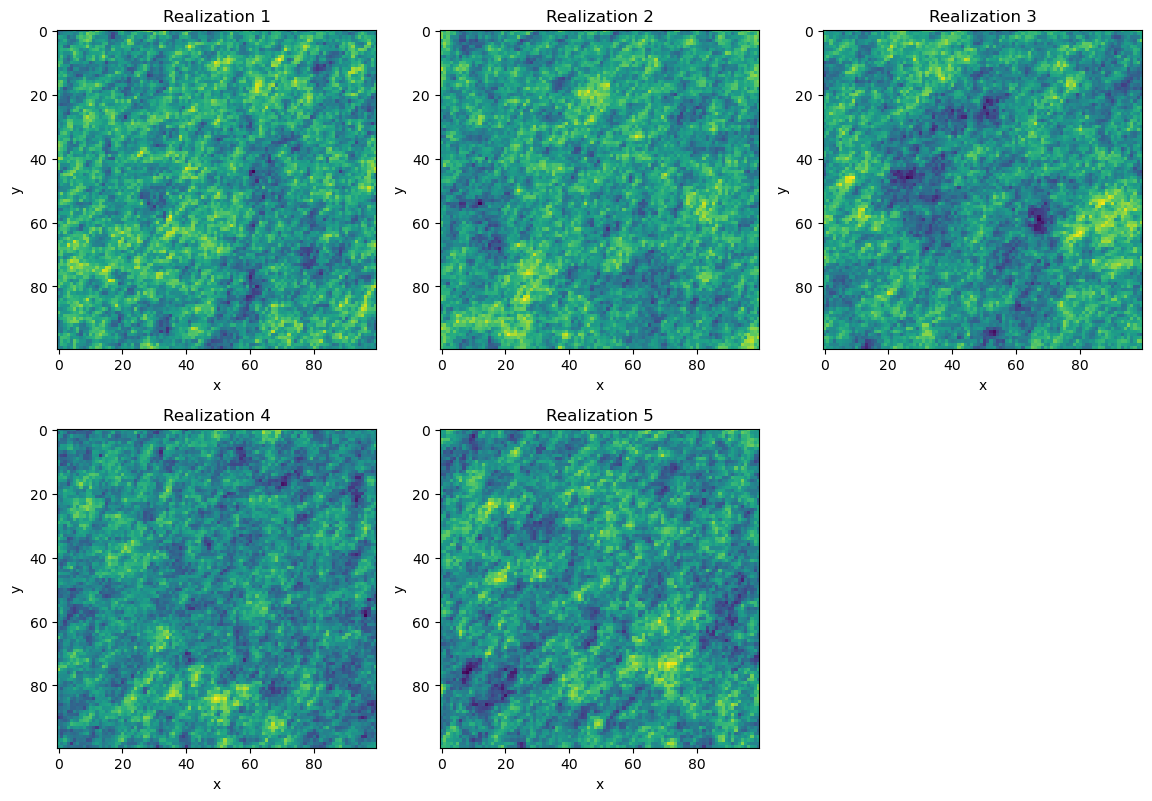

In [13]:
print('\n', r'                                 Real GRF delta(r) from 5 realizations (ifft)')
figure, axis = plt.subplots(2, 3)

axis[0, 0].imshow(real_GRF1.real)  # *** '.real' SE LE TUVO QUE ṔONER PARA QUE PERMITIERA IMSHOW
axis[0, 0].set_title(r'Realization 1')

axis[0, 1].imshow(real_GRF2.real)
axis[0, 1].set_title(r'Realization 2')

axis[0, 2].imshow(real_GRF3.real)
axis[0, 2].set_title(r'Realization 3')

axis[1, 0].imshow(real_GRF4.real)
axis[1, 0].set_title(r'Realization 4')

axis[1, 1].imshow(real_GRF5.real)
axis[1, 1].set_title(r'Realization 5')

axis[-1, -1].axis('off')

for ax in axis.flat:
    ax.set(xlabel='x', ylabel='y')

plt.rcParams["figure.figsize"] = (14,9.5)
plt.show()

## 2 Use spherical Harmonics to generate a realistic CMB realisation

(for this we use angular power spectrum of the form $\ell, C_\ell$).

With CAMB, generate the **Temperature angular power spectrum** $C_\ell^{TT}$ for the following **cosmology**:

*Cosmo* : Ωcdm = 0.25, Ωb = 0.05, ΩΛ = 0.7 and H0 = 70km.s$^{−1}$/Mpc.

The idea of this exercise is to **generate a spherical harmonics gaussian random field** using the special part of the *scipy* library. So you will need to import it.


You will generate a **map of CMB temperature** using the *sph_harm()* function for the first 20 $\ell$ of the $C_\ell$ you will get from *pyCAMB* for the   _ . In order to help, we propose to follow these steps:

1. Use cosmology 1 of the first exercise and get the $<TT>$ power spectrum $C_\ell$

2. Using the $C_\ell$ information for the modes between $\ell = 1$ and $\ell = 20$ generate gaussian random values for the $a_{l,m}$

3. Create two arrays corresponding to θ ∈ [0,π] and φ ∈ [0,2π] with 300 bins of values.

4. Create the 2D_arrays of θ and φ values using the function np.meshgrid

5. Generate the map of temperature using the values of the al,m you get with the spherical harmonics provided by: sp.special.sph_harm(m,l,theta_2D, phi_2D) taking only the real part of the result.

6. Plot the map of temperature you obtain

In [14]:
# from camb import model, initialpower

# Defining cosmology
Omega_cdm = 0.25
Omega_b = 0.05
Omega_L = 0.7
H0 = 70      # in units of km/s/Mpc
h= H0/100

params = camb.CAMBparams()
params.set_cosmology(H0=70.0, ombh2= Omega_b*h**2, omch2=Omega_cdm*h**2, omk=0)
params.InitPower.set_params(As=2e-9, ns=0.965, r=0)
params.set_for_lmax(2500, lens_potential_accuracy=0);

In [15]:
# Calculating the results for this set of parameters
results = camb.get_results(params)

#getting dictionary of CAMB power spectra (PS)
powers =results.get_cmb_power_spectra(params, CMB_unit='muK')

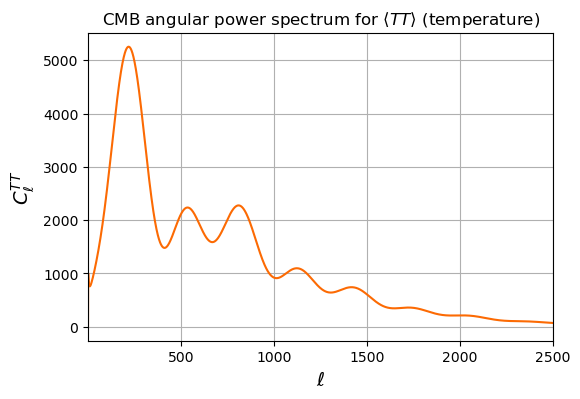

In [17]:
totCL = powers['total']    # First defining the total PS

ls = np.arange(totCL.shape[0])  # array of values from 0 to the number of rows (shape[0])

plt.plot(ls,totCL[:,0], color = '#FC6A03') # orange
plt.title(r'CMB angular power spectrum for $\langle TT \rangle$ (temperature)')
plt.xlabel(r'$\ell$', fontsize = 14)
plt.ylabel(r'$C_\ell^{TT}$', fontsize = 14)
plt.xlim([2,2500]);
plt.rcParams["figure.figsize"] = (6,4)
plt.grid()

### 2
From this we can see that the information desired (i.e., $\ell,\ C_\ell$) is precisely contained in the np.arrays **ls** and **totCL** (where the first entrances [:,0] in the second dimension stands for the TT case).

So, the information from the modes between $\ell = [1,20]$ to generate gaussian rand. val. for $a_{l,m}$ are

In [18]:
print(totCL.shape) # it has 4 columns, where the first is the one we want (Temp.)
totCL_20 = totCL[1:21,0]
totCL_20

(2551, 4)


array([   0.        , 1003.94263563,  943.26896709,  884.75524091,
        839.57969728,  807.20664939,  785.34929439,  771.12732837,
        762.72764129,  758.94233914,  758.37172824,  761.38246965,
        765.82786883,  771.64245233,  777.88155757,  786.09827255,
        796.07746561,  806.67456044,  818.6390747 ,  830.35698363])

For this, we have to remember the spherical harmonic decomposition as

$$
    \delta(\theta,\varphi) = \sum_{\ell=0}^{\infty} \sum_{m=-\ell}^{\ell} a_{\ell m} Y_{\ell m}(\theta,\varphi), 
$$

where $Y_{\ell,m}(\theta, \varphi)$ is a complete orthonormal base that satisfies

$$
    \int d\Omega Y_{\ell,m}(\theta, \varphi) Y^{*}_{\ell',m'}(\theta, \varphi) = \delta_{\ell \ell'}\delta_{m m'}
$$

and $\langle a_{\ell m} \rangle = 0$, but $\boxed{\langle a_{\ell m} a^{*}_{\ell' m'} \rangle = \delta_{\ell \ell'}\delta_{m m'} C(\ell)}$ (i.e., the variance of $a_{\ell,m}$ is related to $C(\ell)$.

So, we're gonna use this last relation with the $C(\ell)$ info to write down the coefficients $a$:

In [19]:
# so, generating gaussian random values for the 𝑎_𝑙,𝑚
# (there are 2l+1 values of m for every l, so, a total of 3 + 5 + 7 + ... + 39 + 41 = 440)

# 3. Creating the corresponding θ ∈ [0,π] and φ ∈ [0,2π] with 300 bins of values
theta = np.linspace(0,2*np.pi, 300) # not random.uniform
phi = np.linspace(0,np.pi, 300)

# 4. Creating 2D_arr of θ and φ values using np.meshgrid
theta_2D, phi_2D = np.meshgrid(theta,phi)
sigma_alm = np.sqrt(totCL_20)
counter = 0 # we use this counter just to ensure we're indeed having 440 a_lm's and Y_lm's, i.e., 440 deltas 

# 5. Generating the map of temperature using the values of the al,m you get with the spherical harmonics
# provided by sp.special.sph_harm(m,l,theta_2D, phi_2D)
delta = np.zeros((300,300), dtype = complex)

for l in range(1,21):
    for m in range(-l,l+1):
        counter += 1
        a_lm = sigma_alm[l-1]*np.random.randn(1)# remember <a_lm> = 0
        delta += a_lm *sp.special.sph_harm(m,l,theta_2D,phi_2D).real
delta

array([[-35.04495988+0.j, -35.04495988+0.j, -35.04495988+0.j, ...,
        -35.04495988+0.j, -35.04495988+0.j, -35.04495988+0.j],
       [-50.06666949+0.j, -50.06322358+0.j, -50.05288807+0.j, ...,
        -50.05288807+0.j, -50.06322358+0.j, -50.06666949+0.j],
       [-67.5815434 +0.j, -67.57351763+0.j, -67.54944803+0.j, ...,
        -67.54944803+0.j, -67.57351763+0.j, -67.5815434 +0.j],
       ...,
       [-54.86472811+0.j, -54.8531881 +0.j, -54.81856962+0.j, ...,
        -54.81856962+0.j, -54.8531881 +0.j, -54.86472811+0.j],
       [-23.51356948+0.j, -23.50714549+0.j, -23.4878756 +0.j, ...,
        -23.4878756 +0.j, -23.50714549+0.j, -23.51356948+0.j],
       [  8.14583072+0.j,   8.14583072+0.j,   8.14583072+0.j, ...,
          8.14583072+0.j,   8.14583072+0.j,   8.14583072+0.j]])

In [20]:
delta.shape

(300, 300)

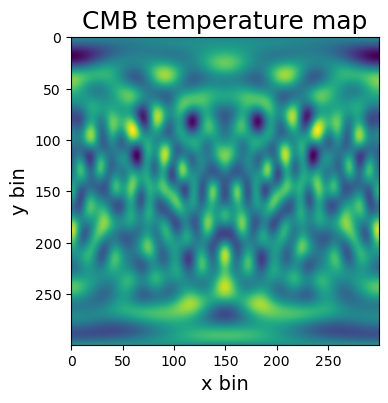

In [24]:
# 6. Plotting the temp. map obtained (taking only the real part of the result)

plt.imshow(delta.real)
plt.title(r'CMB temperature map', fontsize = 18)
plt.xlabel(r'x bin', fontsize = 14)
plt.ylabel(r'y bin', fontsize = 14)
plt.rcParams["figure.figsize"] = (4,4)

7. BONUS : You probably see that the plot you obtain is deformed. That is due to the projection effect because the θ and φ values correspond to a spherical projection rather than a plane. So, you can try to generate a 3D plot on a sphere using the following :

**from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D**

    fig = plt.figure(figsize=(18,18))
    fmax, fmin = map.max(), map.min()
    fcolors = (mapR - fmin)/(fmax - fmin)
    ax = fig.add_subplot(111, projection=’3d’)
    x = np.sin(phi_2D) * np.cos(theta_2D)
    y = np.sin(phi_2D) * np.sin(theta_2D)
    z = np.cos(phi_2D)
    ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=cm.jet(fcolors))
    ax.set_axis_off()
    plt.show()

where **map** is the temperature map (real values) you just obtain before. You can recognize that x,y and z
are the spherical coordinates for a unity sphere.

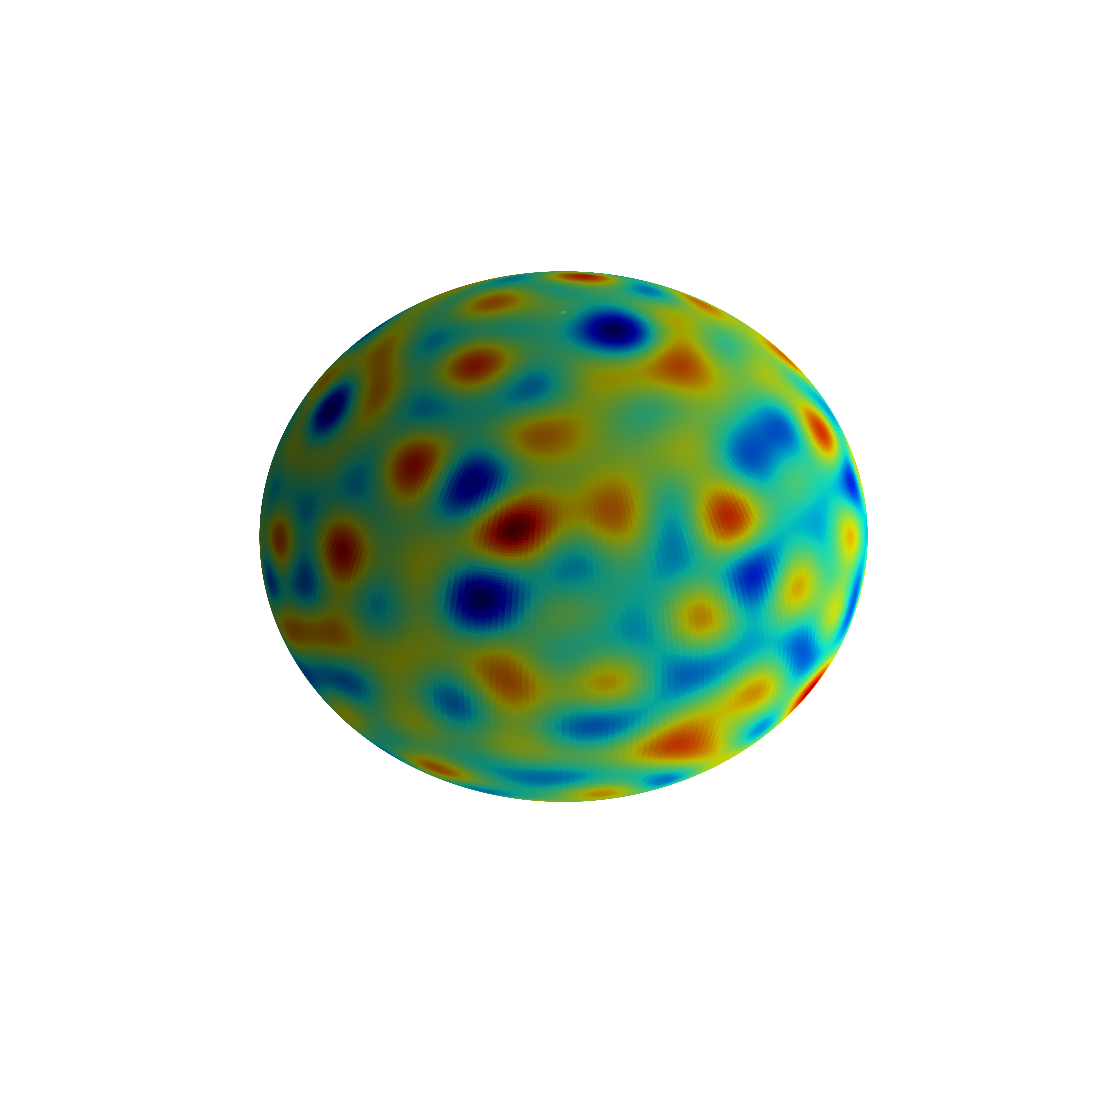

In [25]:
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
# %matplotlib notebook

delta = delta.real
fig = plt.figure(figsize=(14,14))
fmax, fmin = delta.max(), delta.min()
fcolors = (delta - fmin)/(fmax - fmin)
ax = fig.add_subplot(111, projection='3d')
x = np.sin(phi_2D) * np.cos(theta_2D)
y = np.sin(phi_2D) * np.sin(theta_2D)
z = np.cos(phi_2D)
ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=cm.jet(fcolors))
ax.set_axis_off()
plt.show()